In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_feedback_dataset.csv to customer_feedback_dataset.csv


In [ ]:
import pandas as pd
import warnings; warnings.filterwarnings("ignore")

In [ ]:
customer_feedback = pd.read_csv("/content/customer_feedback_dataset.csv")

In [ ]:
customer_feedback

,Review_ID,Customer_ID,Review_Text,Sentiment_Label,Rating,Service_Type
0,1287c703-a09e-40f3-b17c-92bc37b47790,2c946bca-ef75-45a7-9bde-43e7f7ab2979,The website is slow and unresponsive. I tried ...,Negative,1,Claim
1,8f879862-6cdf-48b8-8ffc-5d3cd8cf9b66,eee5da15-5e7d-4a21-9159-045b0799f7c3,Extremely dissatisfied with the level of servi...,Negative,1,Support
2,58219807-817d-4abe-ab42-26ed5610888d,9940be2e-0929-4b59-bd28-45aafae8ea26,One of the best experiences I've had with a se...,Positive,5,Claim
3,31bd9516-5a52-4f6a-8d3b-70a2f79903aa,f7e9d7be-34b1-4776-ae4d-845579ecf756,The service was neither great nor bad. I got m...,Neutral,4,Policy Purchase
4,7b34f439-42a6-4fe7-ad4e-373558000b1b,96ddd94a-9402-4b37-bd06-b04976f3a0bb,I had a terrible experience with the claims de...,Negative,1,Support
...,...,...,...,...,...,...
4995,4008f56f-b790-4df6-8488-3d6d35d9b8d9,fd9858f1-c01c-4e2c-b8c9-13eb816f4bfc,"The service met my expectations, nothing more,...",Neutral,4,Support
4996,b3096e1a-f36d-4a00-8e77-c4972af791b2,6d6196fb-e167-4b53-b58e-761e82ccf72f,Had an average experience with the claims proc...,Neutral,2,Support
4997,7d5c898b-0765-4eb3-af7d-5e3927972ad0,a44cdb6e-4edf-4eae-a71b-13c2a3782795,One of the best experiences I've had with a se...,Positive,4,Support
4998,ed4260fa-9510-455e-b6f3-5775f86bfc20,547f0c00-1d72-41fe-933a-7f3b1b40bcb8,Excellent service! The team was very professio...,Positive,4,Policy Purchase


In [ ]:
customer_feedback.isna().sum()

,0
Review_ID,0
Customer_ID,0
Review_Text,0
Sentiment_Label,0
Rating,0
Service_Type,0


In [ ]:
customer_feedback.describe()

,Rating
count,5000.00000
mean,2.97300
std,1.36713
min,1.00000
25%,2.00000
50%,3.00000
75%,4.00000
max,5.00000


In [ ]:
customer_feedback['Sentiment_Label'].unique()

array(['Negative', 'Positive', 'Neutral'], dtype=object)

In [ ]:
customer_feedback['Rating'].unique()

array([1, 5, 4, 2, 3])

In [ ]:
customer_feedback['Service_Type'].unique()

array(['Claim', 'Support', 'Policy Purchase'], dtype=object)

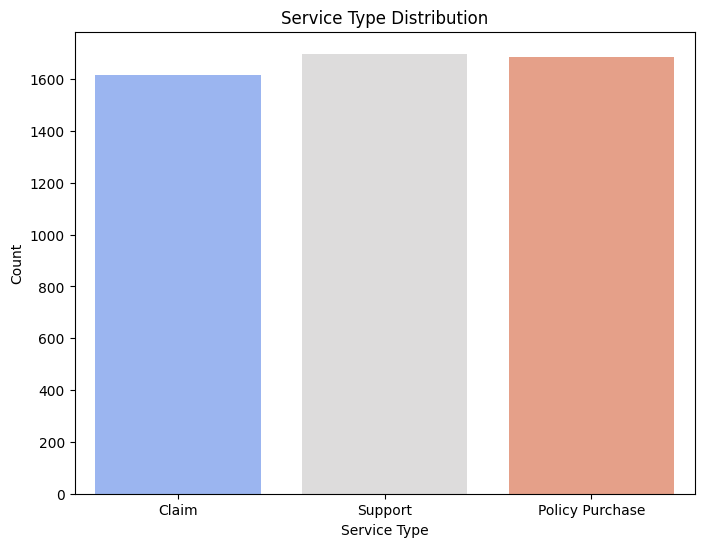

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=customer_feedback, x='Service_Type', palette='coolwarm')
plt.title("Service Type Distribution")
plt.xlabel("Service Type")
plt.ylabel("Count")
plt.show()

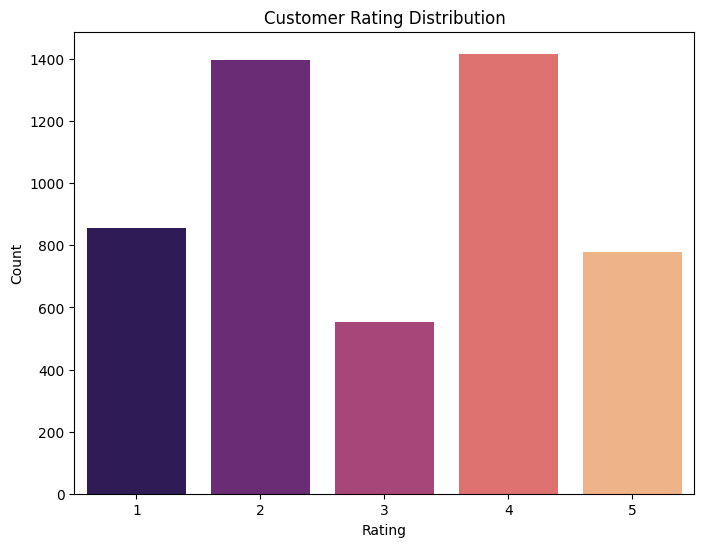

In [ ]:
# Plot Rating Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_feedback, x='Rating', palette='magma')
plt.title("Customer Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Define preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters, punctuation, numbers
    tokens = word_tokenize(text)  # Tokenization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatization & remove stopwords
    return " ".join(tokens)  # Join words back into a single string

customer_feedback["Cleaned_Review_Text"] = customer_feedback["Review_Text"].astype(str).apply(preprocess_text)

# View original vs cleaned text
print(customer_feedback[["Review_Text", "Cleaned_Review_Text"]].head())

                                         Review_Text  \
0  The website is slow and unresponsive. I tried ...   
1  Extremely dissatisfied with the level of servi...   
2  One of the best experiences I've had with a se...   
3  The service was neither great nor bad. I got m...   
4  I had a terrible experience with the claims de...   

                                 Cleaned_Review_Text  
0  website slow unresponsive tried purchase polic...  
1  extremely dissatisfied level service provided ...  
2  one best experience service provider policy pu...  
3  service neither great bad got policy time webs...  
4  terrible experience claim department kept aski...  


In [ ]:
#  Sentiment Labeling

def convert_rating_to_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

customer_feedback["Sentiment_Label"] = customer_feedback["Rating"].apply(convert_rating_to_sentiment)

In [ ]:
customer_feedback.drop(['Review_Text'], axis = 1, inplace = True)

In [ ]:
customer_feedback

,Review_ID,Customer_ID,Sentiment_Label,Rating,Service_Type,Cleaned_Review_Text
0,1287c703-a09e-40f3-b17c-92bc37b47790,2c946bca-ef75-45a7-9bde-43e7f7ab2979,Negative,1,Claim,website slow unresponsive tried purchase polic...
1,8f879862-6cdf-48b8-8ffc-5d3cd8cf9b66,eee5da15-5e7d-4a21-9159-045b0799f7c3,Negative,1,Support,extremely dissatisfied level service provided ...
2,58219807-817d-4abe-ab42-26ed5610888d,9940be2e-0929-4b59-bd28-45aafae8ea26,Positive,5,Claim,one best experience service provider policy pu...
3,31bd9516-5a52-4f6a-8d3b-70a2f79903aa,f7e9d7be-34b1-4776-ae4d-845579ecf756,Positive,4,Policy Purchase,service neither great bad got policy time webs...
4,7b34f439-42a6-4fe7-ad4e-373558000b1b,96ddd94a-9402-4b37-bd06-b04976f3a0bb,Negative,1,Support,terrible experience claim department kept aski...
...,...,...,...,...,...,...
4995,4008f56f-b790-4df6-8488-3d6d35d9b8d9,fd9858f1-c01c-4e2c-b8c9-13eb816f4bfc,Positive,4,Support,service met expectation nothing nothing less g...
4996,b3096e1a-f36d-4a00-8e77-c4972af791b2,6d6196fb-e167-4b53-b58e-761e82ccf72f,Negative,2,Support,average experience claim process difficult sub...
4997,7d5c898b-0765-4eb3-af7d-5e3927972ad0,a44cdb6e-4edf-4eae-a71b-13c2a3782795,Positive,4,Support,one best experience service provider policy pu...
4998,ed4260fa-9510-455e-b6f3-5775f86bfc20,547f0c00-1d72-41fe-933a-7f3b1b40bcb8,Positive,4,Policy Purchase,excellent service team professional helpful an...


In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Load pretrained BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Function to extract BERT embedding using [CLS] token
# Function to get BERT embeddings
def get_bert_embeddings(text):
    tokens = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**tokens)
    return outputs.last_hidden_state[:, 0, :].squeeze().numpy()


customer_feedback["BERT_Vector"] = customer_feedback["Cleaned_Review_Text"].astype(str).apply(get_bert_embeddings)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
customer_feedback

,Review_ID,Customer_ID,Sentiment_Label,Rating,Service_Type,Cleaned_Review_Text,BERT_Vector
0,1287c703-a09e-40f3-b17c-92bc37b47790,2c946bca-ef75-45a7-9bde-43e7f7ab2979,Negative,1,Claim,website slow unresponsive tried purchase polic...,"[-0.22173028, -0.32246143, 0.42346647, 0.03791..."
1,8f879862-6cdf-48b8-8ffc-5d3cd8cf9b66,eee5da15-5e7d-4a21-9159-045b0799f7c3,Negative,1,Support,extremely dissatisfied level service provided ...,"[-0.07284471, 0.01002994, 0.40242794, -0.02473..."
2,58219807-817d-4abe-ab42-26ed5610888d,9940be2e-0929-4b59-bd28-45aafae8ea26,Positive,5,Claim,one best experience service provider policy pu...,"[0.030232083, -0.21350563, 0.5240594, -0.05826..."
3,31bd9516-5a52-4f6a-8d3b-70a2f79903aa,f7e9d7be-34b1-4776-ae4d-845579ecf756,Positive,4,Policy Purchase,service neither great bad got policy time webs...,"[0.08313921, -0.25608605, 0.3593237, 0.0035895..."
4,7b34f439-42a6-4fe7-ad4e-373558000b1b,96ddd94a-9402-4b37-bd06-b04976f3a0bb,Negative,1,Support,terrible experience claim department kept aski...,"[0.108844504, -0.0967142, 0.56968576, 0.209311..."
...,...,...,...,...,...,...,...
4995,4008f56f-b790-4df6-8488-3d6d35d9b8d9,fd9858f1-c01c-4e2c-b8c9-13eb816f4bfc,Positive,4,Support,service met expectation nothing nothing less g...,"[0.45943224, -0.43885842, 0.19395448, -0.25207..."
4996,b3096e1a-f36d-4a00-8e77-c4972af791b2,6d6196fb-e167-4b53-b58e-761e82ccf72f,Negative,2,Support,average experience claim process difficult sub...,"[0.15036574, 0.06419507, 0.24977738, 0.0936123..."
4997,7d5c898b-0765-4eb3-af7d-5e3927972ad0,a44cdb6e-4edf-4eae-a71b-13c2a3782795,Positive,4,Support,one best experience service provider policy pu...,"[0.030232083, -0.21350563, 0.5240594, -0.05826..."
4998,ed4260fa-9510-455e-b6f3-5775f86bfc20,547f0c00-1d72-41fe-933a-7f3b1b40bcb8,Positive,4,Policy Purchase,excellent service team professional helpful an...,"[0.16255184, 0.015801255, 0.3930343, -0.107644..."


In [ ]:
import pickle

with open('bert_embeddings.pkl', 'wb') as f:
    pickle.dump({
        'embeddings': customer_feedback["BERT_Vector"].tolist(),
        'texts': customer_feedback["Cleaned_Review_Text"].iloc[:5000].tolist()
    }, f)

print("Done! Saved to bert_embeddings.pkl")

Done! Saved to bert_embeddings.pkl


In [ ]:
customer_feedback['Sentiment_Label'].value_counts(normalize=True)

,proportion
Sentiment_Label,
Negative,0.4506
Positive,0.4390
Neutral,0.1104


In [ ]:
import numpy as np
X = np.stack(customer_feedback['BERT_Vector'].values)  # Convert embeddings to numerical array
y = customer_feedback['Sentiment_Label']

In [ ]:
import pickle

# Encode categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Ensure y is defined properly

# Save the label encoder to disk
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter


# Before SMOTE: Check class distribution
print("Class distribution before SMOTE:")
print(Counter(y))  # Instead of df['Sentiment_Label']

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# After SMOTE: Check class distribution
print("\nClass distribution after SMOTE:")
print(Counter(y_resampled))  # Print numerical class counts

# Convert back to categorical labels for readability
y_resampled_labels = label_encoder.inverse_transform(y_resampled)
print("\nClass distribution (labels) after SMOTE:")
print(Counter(y_resampled_labels))  # Now showing categorical labels

Class distribution before SMOTE:
Counter({'Negative': 2253, 'Positive': 2195, 'Neutral': 552})

Class distribution after SMOTE:
Counter({np.int64(0): 2253, np.int64(2): 2253, np.int64(1): 2253})

Class distribution (labels) after SMOTE:
Counter({'Negative': 2253, 'Positive': 2253, 'Neutral': 2253})


In [ ]:
import pickle

# Encode categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Ensure y is defined properly




In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Prepare Data: Convert BERT embeddings and labels into tensors
X_resampled_tensor = torch.tensor(X_resampled, dtype=torch.float32)
y_resampled_tensor = torch.tensor(y_resampled, dtype=torch.long)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled_tensor, y_resampled_tensor, test_size=0.2, random_state=42)

# Create DataLoaders
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define the Neural Network Model (MLP)
class SentimentModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SentimentModel, self).__init__()

        # Deeper network with more layers
        self.fc1 = nn.Linear(input_dim, 512)  # Increased the size of the first hidden layer
        self.fc2 = nn.Linear(512, 256)  # Added a second hidden layer with 256 neurons
        self.fc3 = nn.Linear(256, 128)  # Third hidden layer
        self.fc4 = nn.Linear(128, 64)   # Fourth hidden layer
        self.fc5 = nn.Linear(64, output_dim)  # Output layer
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)  # Added Dropout layer with 30% dropout rate to prevent overfitting

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.fc5(x)  # Output layer
        return x  # Return raw logits (no Softmax)

# Initialize the model
model = SentimentModel(input_dim=X_resampled_tensor.shape[1], output_dim=3)  # 3 classes (Negative, Neutral, Positive)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
def train_model(model, train_loader, criterion, optimizer, epochs=30):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}')

train_model(model, train_loader, criterion, optimizer)

# Evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.append(preds)
            all_labels.append(labels)

    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)

    # Metrics
    print(classification_report(all_labels.cpu(), all_preds.cpu(), target_names=["Negative", "Neutral", "Positive"]))
    print("Confusion Matrix:")
    print(confusion_matrix(all_labels.cpu(), all_preds.cpu()))

evaluate_model(model, test_loader)


Epoch 1/30, Loss: 0.5370110656030079
Epoch 2/30, Loss: 0.4346953529930679
Epoch 3/30, Loss: 0.42993745886715207
Epoch 4/30, Loss: 0.43206418063160934
Epoch 5/30, Loss: 0.42902085476020385
Epoch 6/30, Loss: 0.4278135127746142
Epoch 7/30, Loss: 0.43101167282056524
Epoch 8/30, Loss: 0.4287506060663765
Epoch 9/30, Loss: 0.4248657444348702
Epoch 10/30, Loss: 0.42520539894611875
Epoch 11/30, Loss: 0.42540345706883265
Epoch 12/30, Loss: 0.4248762158952521
Epoch 13/30, Loss: 0.42341334862116525
Epoch 14/30, Loss: 0.4244202953383062
Epoch 15/30, Loss: 0.4425149747782205
Epoch 16/30, Loss: 0.4241506318016165
Epoch 17/30, Loss: 0.4229634447386984
Epoch 18/30, Loss: 0.4235555976629257
Epoch 19/30, Loss: 0.42322549091641015
Epoch 20/30, Loss: 0.42247020413536995
Epoch 21/30, Loss: 0.4221707639785913
Epoch 22/30, Loss: 0.42272543528023554
Epoch 23/30, Loss: 0.4230123277775635
Epoch 24/30, Loss: 0.4217065907794343
Epoch 25/30, Loss: 0.4224705421007596
Epoch 26/30, Loss: 0.42229855616064466
Epoch 27/3

In [ ]:
# Save the model's state_dict (weights)
torch.save(model.state_dict(), 'sentiment_model.pth')

# Optionally, save the tokenizer as well for BERT
tokenizer.save_pretrained('./tokenizer')

('./tokenizer/tokenizer_config.json',
 './tokenizer/special_tokens_map.json',
 './tokenizer/vocab.txt',
 './tokenizer/added_tokens.json')